Import The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn.preprocessing import StandardScaler

Create the Linear Regression Model Class

In [2]:
class LinearRegression:

    def __init__(self, iterations, alpha):
        self.iterations = iterations
        self.alpha = alpha
        self.theta = None
    
    def fit(self, X, y):
        X = np.insert(X.reshape(-1, 1), 0, 1, axis=1)
        self.theta = np.zeros(X.shape[1])
        m = len(y)
        
        for i in range(self.iterations):
            h = np.dot(X, self.theta)
            gradient = (1/m) * np.dot(X.T, (h - y))
            
            self.theta -= self.alpha * gradient
            
            # Track the cost function
            cost = np.mean((h - y)**2) / 2
            if i % 1000 == 0:
                print(f"Iteration {i}, Cost: {cost}")
    
    def predict(self, X):
        X = np.insert(X.reshape(-1, 1), 0, 1, axis=1)
        return np.dot(X, self.theta)
    

We are going to use solve the Week01_Challenge

In [3]:
df = pd.read_csv('Valhalla23.csv')
df.head()

,Celsius,Valks
0,61.4720,-139.740
1,70.5790,-156.600
2,-7.3013,73.269
3,71.3380,-165.420
4,43.2360,-75.835


Split the data into train and test sets

In [4]:
train_size = 0.8
train = df[:int(len(df)*train_size)]
test = df[int(len(df)*train_size):]

Get and scale the X and Y values

In [5]:
X_train, y_train = train["Celsius"].values, train["Valks"].values
X_test, y_test = test["Celsius"].values, test["Valks"].values

# Normalize the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler_X.transform(X_test.reshape(-1, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

Create and train the model

The initial value of alpha will be 0.01 so i can increase the number of iterations. 

In [6]:
model = LinearRegression(iterations=10000, alpha=0.01)
model.fit(X_train_scaled, y_train_scaled)

Iteration 0, Cost: 0.4999999999999999
Iteration 1000, Cost: 0.0025798964683106966
Iteration 2000, Cost: 0.0025798955412406938
Iteration 3000, Cost: 0.002579895541240691
Iteration 4000, Cost: 0.002579895541240692
Iteration 5000, Cost: 0.002579895541240692
Iteration 6000, Cost: 0.002579895541240692
Iteration 7000, Cost: 0.002579895541240692
Iteration 8000, Cost: 0.002579895541240692
Iteration 9000, Cost: 0.002579895541240692


Make predictions and get the cost function of the test data

In [7]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# get the rmse error
rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# get the cost function for the test set
X_test_scaled = np.insert(X_test_scaled.reshape(-1, 1), 0, 1, axis=1)
h = np.dot(X_test_scaled, model.theta)
cost = np.mean((h - y_test_scaled)**2) / 2

print(f"RMSE for test data: {rmse}")
print(f"Cost for test data: {cost}")

RMSE for test data: 119.20040285098025
Cost for test data: 0.003986036063576564


Plot the predictions

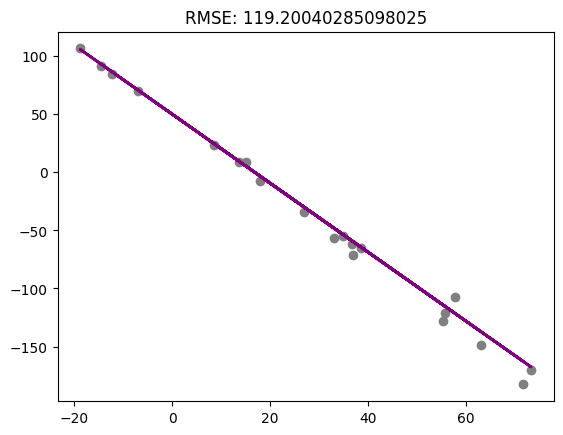

In [8]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='purple', linewidth=2)
plt.title(f'RMSE: {rmse}')
plt.show()

In [9]:
print(f"Learned parameters (theta): {model.theta}")

Learned parameters (theta): [ 1.10422088e-16 -9.97416768e-01]
